# 2. Machine Learning for Regression

In [1]:
import pandas as pd
import numpy as np

## 2.2 Data Preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df  = pd.read_csv(data)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [5]:
df.head(1) #More uniform

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [6]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [7]:
for col in strings:
    df[col] =  df[col].str.lower().str.replace(' ','_')

In [8]:
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## 2.3 Data Exploratory Analysis

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[0:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution of price

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

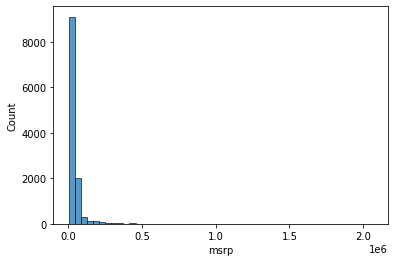

In [11]:
sns.histplot(df.msrp, bins=50)
plt.show()

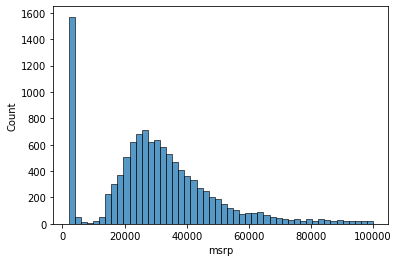

In [12]:
sns.histplot(df.msrp[df.msrp <100000], bins=50)
plt.show()

In [13]:
np.log([1,10,1000, 100000])

array([ 0.        ,  2.30258509,  6.90775528, 11.51292546])

In [14]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

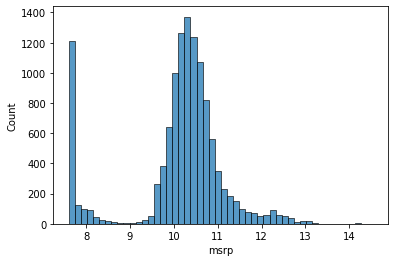

In [15]:
sns.histplot(price_logs, bins=50)
plt.show()

Missing values

In [16]:
df.isnull().sum() 

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

In [17]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test


In [18]:
n_val , n_test , n_train

(2382, 2382, 7150)

In [19]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [20]:
idx = np.arange(n)

In [21]:
np.random.seed(2)
np.random.shuffle(idx)

In [22]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [23]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [24]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [27]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear Regression

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [29]:
xi = [232,16,586]

In [30]:
w0 = 7.17
w = [0.01,0.04,0.002]

In [31]:
def linear_regression(xi):
    n = len(xi)
    pred = w0

    for j in range(n):
        pred = pred + w[j]* xi[j]
    
    return pred

In [32]:
linear_regression(xi=xi)

11.302000000000001

In [33]:
np.exp(11.30) - 1

80820.6375403136

## 2.6 Linear regression vector form

In [34]:
def dot(xi,w):
    n = len(xi)

    res = 0.0
    for j in range(n):
        res = res + xi[j]*w[j]
    
    return res

In [35]:
def linear_regression(xi):
    return w0 + dot(xi,w)

In [36]:
linear_regression(xi=xi)

11.302

In [37]:
w_new = [w0] + w

In [38]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [39]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi,w_new)

In [40]:
linear_regression(xi)

11.302000000000001

In [41]:
w0 = 7.17
w = [0.01,0.04,0.002]
w_new = [w0] + w

In [42]:
x1 = [1,148, 24, 1385]
x2 = [1,132, 25, 2031]
x10 = [1,232,16,586]

X = [x1,x2,x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  232,   16,  586]])

In [43]:
def linear_regression(X):
    return X.dot(w_new)


In [44]:
linear_regression(X)

array([12.38 , 13.552, 11.302])

## 2.7 Training linear regression

In [78]:
X = [
[148, 24, 1385],
[132, 25, 2031],
[232,16,586],
[158, 24, 185],
[172, 25, 201],
[413,16,586],
[38, 54, 185],
[142, 25, 431],
[453,31,86],
]


X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 232,   16,  586],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   16,  586],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [57]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [62]:
X = np.column_stack([ones,X])

In [76]:
y = [100,200,150,250,100,200,150,250,120]

In [64]:
XTX = X.T.dot(X)

In [65]:
XTX_inv = np.linalg.inv(XTX)

In [68]:
w_full = XTX_inv.dot(X.T).dot(y)

In [70]:
w0 = w_full[0]
w = w_full[1:]

In [71]:
w0,w

(259.0226411147998, array([-0.14060836, -1.92719364, -0.01465974]))

In [79]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [80]:
train_linear_regression(X,y)

(259.0226411147998, array([-0.14060836, -1.92719364, -0.01465974]))

## 2.8 Car price baseline model

In [83]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [84]:
base = ['engine_hp','engine_cylinders','highway_mpg', 'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [86]:
X_train = df_train[base].values

In [90]:
X_train = df_train[base].fillna(0).values

In [92]:
w0, w = train_linear_regression(X_train,y_train)

In [94]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

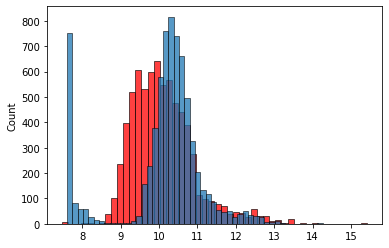

In [99]:
sns.histplot(y_pred, color='r', bins=50)
sns.histplot(y_train, bins=50)

## 2.9 RMSE

In [100]:
def rmse(y, y_pred):
    error= y - y_pred
    se = error**2
    mse= se.mean()
    return np.sqrt(mse)

In [101]:
rmse(y_train,y_pred)

0.7554192603920132

## 2.10 Validating the model

In [ ]:
X_train = df_train[base].values
X_train = df_train[base].fillna(0).values
w0, w = train_linear_regression(X_train,y_train)
y_pred = w0 + X_train.dot(w)

In [102]:
def prepare_X(df):
    df_num = df[base]

    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [104]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.761653099130156

## 2.11 Simple feature engineering

In [105]:
2017 - df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [108]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [109]:
X_train = prepare_X(df_train)

In [114]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058299

## 2.12 Categorical Variables

In [124]:
#for v in [2,3,4]:
#   df_train['num_doors_%s' %v] = (df_train.number_of_doors == v).astype('int')

df_train['num_doors_4'] = (df_train.number_of_doors == 4).astype('int')
df_train['num_doors_3'] = (df_train.number_of_doors == 3).astype('int')
df_train['num_doors_2'] = (df_train.number_of_doors == 2).astype('int')

In [130]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [132]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5157995641501727

In [135]:
makes  = list(df.make.value_counts().head().index)

In [136]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [137]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5076038849556801

In [138]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [140]:
df.select_dtypes('object').columns

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')

In [147]:
categorical_variables = ['make', 'engine_fuel_type', 'transmission_type','driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']

In [149]:
categories = {} 

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [152]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features = base + ['age']

    for v in [2,3,4]:
        df['num_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' %(c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' %(c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [153]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

65.08358142630269

## 2.13 Regularization

In [155]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [156]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565175087390711

## 2.14 Tuning the model

In [159]:
for r in [0.0,0.00001,0.0001,0.001,0.1,1,10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train,y_train, r= r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val,y_pred)

    print (r, w0, score)

0.0 1.0328906133489698e+16 65.08358142630269
1e-05 1.2578076830807026 0.4565170117275705
0.0001 6.317213695683179 0.45651706511284773
0.001 6.286078464802934 0.4565175087390711
0.1 6.191208607936318 0.4565692763010184
1 5.634896667563382 0.45722043179993577
10 4.283980108949688 0.4701456932100726


## 2.15 Using the model

In [161]:
df_full_train = pd.concat([df_train, df_val])

In [163]:
df_full_train = df_full_train.reset_index(drop=True)

In [164]:
X_full_train = prepare_X(df_full_train)

In [165]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [167]:
y_full_train = np.concatenate([y_train, y_val])
y_full_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 11.21756062,
        9.77542688, 10.1924563 ])

In [174]:
w0,w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [175]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test,y_pred)
score

0.4517749307636897

In [177]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [178]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [181]:
X_small = prepare_X(df_small)

In [182]:
y_pred = w0 + X_small.dot(w)
y_pred

array([10.46265171])

In [183]:
np.expm1(y_pred)

array([34983.19667422])

In [184]:
y_test[20]

10.463131911491967

In [185]:
np.expm1(y_test[20])

35000.00000000001